**Kaggle** это самый крупный портал на котором проходят соревнования по машинному обучению
(участвовать в них может любой). В качестве домашнего задания предлагается попытать свои силы
на наборе данных **Титаник**.

Начните выполнение этого задания с посещения этой страницы:

https://www.kaggle.com/c/titanic

1. Перейдя по этой ссылке вы попадете на вкладку **Overview**, в верхнем правом углу есть кнопка **Join competition**, после того как вы ее нажмете вы сможете скачать данные по выжившим в крушении Титаника в разделе **Data**.

2. Там же в разделе **Data** в подразделе **Data description**, расположено описание всех признаков содержащихся в данных (в пункте **Data dictionary**). 

3. Раздел **Kernels** содержит готовые решения, опубликованные разными людьми ввиде jupyter notebook'ов (некоторые на языке R, большая часть на языке Python).

4. Раздел **Discussion** - это форум посвященный данному соревнованию (Соревнование Titanic это учебное соревнование для всех).

5. В разделе **Leaderboard** можно увидеть результаты других участников соревнования (на тестовой выборке). Не удивляйтесь большому количеству *идеальных* accuracy (categorization accuracy это тоже самое что и обычное accuracy), данные о пассажирах Титаника есть в открытом доступе и некоторые зачем то их сабмитят (время от времени админы подтирают такие строчки). 

-----------------------


### Ваша ультимативная цель: провести анализ данных, обучить модель (подобрав параметры на кросс валидации), сделать предсказания на тестовом наборе данных и засабмитить их на Leaderboard что бы увидеть получившуюся accuracy.


----------------------

В этом ноутбуке (в котором вы сейчас ^_^) я проведу вас по основным этапам, но выполнить вы их должны будете самостоятельно.

Итак наметим план:

1. Скачаем данные: два .csv файла train.csv и test.csv, в файле test_data отсутствует колонка Survived (на них мы будем делать предсказания обученной моделью).
2. Откроем набор данных train.csv в Jupyter notebook.
3. Проведем Обзорный Анализ Данных (Exploratory Data Analysis сокращенно EDA)
4. Обработаем категориальные признаки (обработаем пропуски в данных (если они есть))
5. Обработаем числовые признаки (обработаем пропуски в данных (если они есть))
6. Обучим 2 модели (или больше):
    - Метод ближайшего соседа (подберем параметр k - число соседей, **на кросс-валидации**)
    - Метод логистической регрессии (подберем параметры регуляризации - alpha, **на кросс-валидации**)
7. Подобрав оптимальный набор параметров обучим наши модели на всех объектах из файла train.csv.
8. Откроем набор данных test.csv в Jupyter notebook.
9. Проведем шаги 4-6 над test.csv **аналогично тому как мы это делали на train.csv**. 
10. Сделаем предсказания с помощью моделей (обученных на шаге 7.) на обработанных test.csv.
11. Сохраним предсказания в нужном формате и загрузим на Leaderboard на Kaggle.


На всякий случай помните, что в этой домашке главными являются пункты 3-10 если у вас возникнут трудности со скачиванием данных или загрузкой результатов предсказания на Leadearboard смело пишите в __#hw_questions!!!!___

Начнем

# 1. Скачаем данные

перйдите в раздел датасетс на странице конкурса и скачйте данные download_all - это если я забуду положить данные рядом.

разархивируем скаченный архив в папку с **этим** ноутбуком (внутри появится папка titanic/)

# 2. Откроем набор данных train.csv

для этого воспользуемся библиотекой pandas
для начало ее импортируем с именем pd.

* Обратите внимание команда: **import pandas as pd** абсолютно аналогична последовательному применению двух команд:
    * import pandas
    * pd = pandas

In [1]:
# импортируем библиотеку pandas c именем pd

import pandas as pd

In [2]:
# 1. откроем train.csv и сохраним его в переменную data_train
# если вы разархивировали скаченный архив в папку с этим нотбуком
# то нужный файл находится по пути titanic/train.csv

# 2. используйте параметр index_col = 0


data_train = pd.read_csv('titanic/train.csv', index_col=0)

# 3. Проведем Обзорный Анализ Данных

In [3]:
# Воспользутесь методом .head() (не функцией, а методом!), который позволяет 
# посмотреть несколько первых записей в таблице данных (по умолчанию 5 первых записей)

data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Для того чтобы понять какой столбец (признак) что означает почитайте об этом в разделе Data
https://www.kaggle.com/c/titanic/data . Пока вы не запомните может быть полезно выписать название всех столбцов
и что они значат прямо в нотбук:

* Survived - 
* Pclass - 
* Name - 
* Sex - 
* Age - 
* SibSp - 
* Parch - 
* Ticket - 
* Fare - 
* Cabin - 
* Embarked -

In [4]:
# воспользуйте методом .shape чтобы посмотреть размеры свой таблицы данных

data_train.shape

(891, 11)

несколько полезных методов которые помогут быстро посмотреть общие характеристики данных:

1. .describe() - Выведет количество, среднее, стандартное отклонение, квантили, минимум и максимум всех **числовых признаков** (столбцов)
2. .columns - это поле а не метод (в конце скобки не надо писать). Выведет название всех колонок.
3. .count() - выведет количесто **не пропущенных** значений в каждом столбце (not nan значений)
4. .nunique() - выведет количество уникальных значений в каждом столбце
5. .dtypes - это поле а не метод (в конце скобки не надо писать). Выведет тип переменной хранящейся в каждом столбце


In [5]:
data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data_train['Age'][data_train.Age.isnull()].index

Int64Index([  6,  18,  20,  27,  29,  30,  32,  33,  37,  43,
            ...
            833, 838, 840, 847, 850, 860, 864, 869, 879, 889],
           dtype='int64', name='PassengerId', length=177)

### Для построения картинок воспользуемся библиотекой matplotlib и библиотекой seaborn

!pip install matplotlib
!pip install seaborn

Воспользуемся *магией* Jupyter notebook (google: Jupyter magic %) %matplotlib inline

https://ipython.readthedocs.io/en/stable/interactive/magics.html

Библиотека примеров seaborn:
https://seaborn.pydata.org/examples/index.html

Официальный тутриал seaborn:
https://seaborn.pydata.org/tutorial.html

##### просмотрите раздел Plotting functions туториала (это займет не более 15-20 минут).

In [7]:
# импортируем модуль pyplot библиотеки matplotlib с именем plt
# импортируем библиотеку seaborn с именем sns

# воспользуемся jupyter magic %matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 3.1. Воспользуемся функцией seaborn .countplot чтобы посмотреть долю выживших.

Нам потребуются параметры:
* **x** - какая величина будет расположена по оси X (в нашем случае это столбец Survived)
* **data** - из какой переменной брать столбец переданный в **x**.

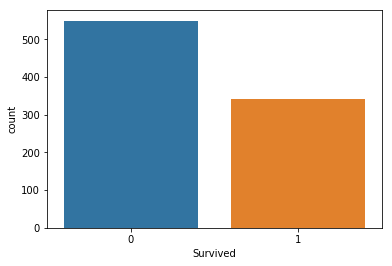

In [8]:
# Воспользуйте функцией seaborn .countplot для того чтобы посомотреть долю Выживших

sns.countplot('Survived', data=data_train);
plt.show()

Поскольку  на графике этого не видно, давайте посмотрим на точное соотношение Выживших и Погибших,
воспользуемся методом

.mean()

на столбце Survived

------
доступ к столбцу Survived можно получить 2 способами:
1. С использованием квадратных скобок: data["Survived"]
2. С использованием оператора . : data.Survived


Кстате полученное значение вы могли уже видеть когда использовали метод .describe() ко всему набору данныз

In [11]:
# воспользуйтесь методом .mean()
# на столбец Survived чтобы узнать долю выживших

data_train.Survived.mean()

0.3838383838383838

### 3.2. Воспользуемся функцией seaborn .catplot чтобы посмотреть долю выживших среди женщин и мужчин.

Нам потребуются параметры:
* **x** - какая величина будет расположена по оси X (в нашем случае это столбец Sex)
* **col** - будет построено несколько одинаковых графиков для различных значений переменной переданной в col (в нашем случае Survived)
* **kind** - тип графика. Поскольку мы хотим посчитаь Количество выживших/погибших, установим его значение "count" 
* **data** - из какой переменной брать столбец переданный в **x, col**.

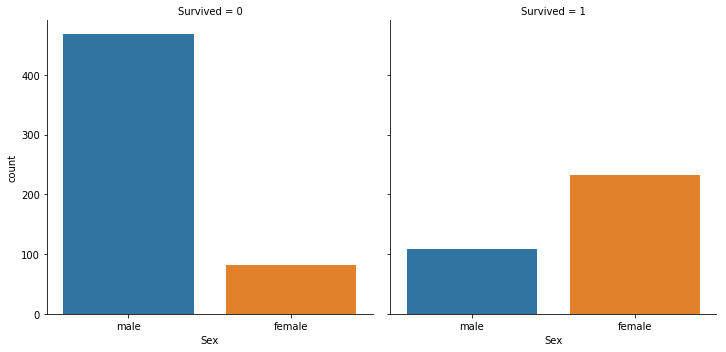

In [12]:
# воспользуйтесь функцией catplot из пакета seaborn

sns.catplot(x='Sex', col='Survived', kind='count', data=data_train);

Поскольку на графике мы не видим точных значений в столбцах, давайте построим **таблицу сопряженности** (Она же **cross tabulation** или **contigency table** она же **pivot table**). 

https://en.wikipedia.org/wiki/Contingency_table

Pandas позволяет сложные таблицы сопряженности со многими уровнями вложенности с использованием функции pandas .crosstab()

Нам потребуются 2 параметра этой функции:

1. index - список колонок которые будут расположены по вертикали (список может состоять из 1 элемента)
2. columns - список колонок которые будут расположены по горизонтали (список может состоять из 1 элемента)
Опционально (использовать отдельно друго от друга)
3. margins - значение True будет показывать сумму по столбцам и строкам
4. normalize - новый параметр позволят отнормировать значения на сумму по строке ('rows'), столбцу ('columns'), или на ту и другую ('all')

Обратите внимание что crosstab() это функция библиотеки Pandas, а не метод 
объекта pandas.DataFrame. Может быть не очень понятно как ее использовать,
если не сможете разобраться, ответ можно найти например тут  https://www.kaggle.com/dejavu23/titanic-eda-to-ml-beginner .
**Но сначала попробуйте погуглить.**

Документация на .crosstab()
http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

In [13]:
# воспользуйтесь функцией crosstab() и построите таблицу сопряженности
# для колнок Sex (по вертикали) и Survived (по горизонтали)

pd.crosstab(index=data_train['Sex'],
            columns=[data_train.Survived])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [14]:
# воспользуйтесь функцией crosstab() и построите таблицу сопряженности 
# для колнок Sex и Survived (по вертикали) и Pclass (по горизонтали)
# установите параметр margins=True


pd.crosstab(index=[data_train.Survived, data_train['Sex']],
            columns=[data_train.Pclass],
            margins=True,)

Pclass             1    2    3  All
Survived Sex                       
0        female    3    6   72   81
         male     77   91  300  468
1        female   91   70   72  233
         male     45   17   47  109
All              216  184  491  891

#### Вопрос: 
Что вы можете сказать выживаемости пассижиров разного класса и пола?

> Выжило больше женщин. Выжило больше пассажиров первого класса.

Давайте визуализируем эту таблицу с помощью bar chart'a.
Для этого мы снова воспользуемся функцией .catplot(), но теперь
нам нужно будет воспользоваться другими параметрами:

* **x** - какая величина будет расположена по оси X (в нашем случае это столбец Sex)
* **y** - какой признак будет отвечать за величину колонок (bar'ов), используем Survived
* **hue** - какой признак будет отвечать за цвет колонок (bar'ов), используем Pclass
* **kind** - тип графика. в этот раз укажем "bar"
* **data** - из какой переменной брать столбец переданный в **x, col**.

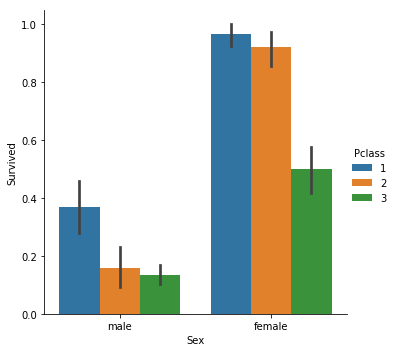

In [15]:
# воспользуйтесь функцией .catplot() и визуализируйте результаты предыдущей таблицы в
# виде bar chart'a

sns.catplot(x="Sex", y="Survived", hue="Pclass",
            kind="bar", data=data_train);

одну и ту же информацию можно подать по-разному,
выбирайте подходящий тип графика!

поменяем параметр kind с 'bar' на 'point'

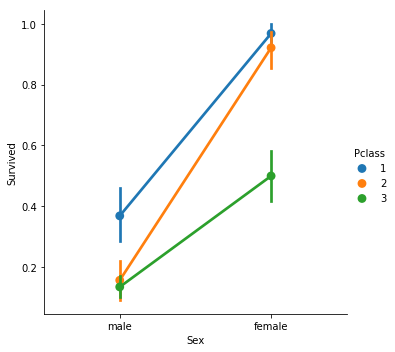

In [16]:
# воспользуйтесь функцией .catplot() и визуализируйте результаты предыдущей таблицы в
# виде line chart'a

sns.catplot(x="Sex", y="Survived", hue="Pclass",
            kind="point", data=data_train);

#### Вопрос:

Какой из способов подачи информации вам показался наиболее информативным:
1. Таблица
2. Bar chart
3. Line chart 

? Все норм

.crosstab() позволяет не только считать количество внутри категорий,
у него есть специальный параметр:
1. values - можно передать сюда столбец для которого будет посчитана aggfunc внутри сложной категории задаваемой вашей таблице

In [17]:
# Постройте предыдующую таблицу
# но теперь воспользуйтесь параметрами values (data_train['Age']) и aggfunc ('mean')

pd.crosstab(index=[data_train.Survived, data_train['Sex']],
            columns=[data_train.Pclass],
            values=data_train['Age'],
            aggfunc='mean',
            margins=True)

Pclass                   1          2          3        All
Survived Sex                                               
0        female  25.666667  36.000000  23.818182  25.046875
         male    44.581967  33.369048  27.255814  31.618056
1        female  34.939024  28.080882  19.329787  28.847716
         male    36.248000  16.022000  22.274211  27.276022
All              38.233441  29.877630  25.140620  29.699118

#### Вопрос: 

Каков средний возраст выживших женщин пассажиров 1 класса?


> 34.939024

#### Факт:
В пандасе есть еще одна функция которая позволяет строить такие таблицы она называется
**.pivot_table** . У нее немножко другая сигнатура, но в целом с ее помощью можно делать тоже самое.
У меня нет объяснения зачем их две.

ps а еще есть функция **.pivot()** но она вроде умеет только две категории, а много не умеет

### 3.3 Давайте сравним стоимость проезда среди выживших и погибших

Для этого воспользуемся функцией .catplot() с параметром kind = 'box'
это позволит нам построить боксплот



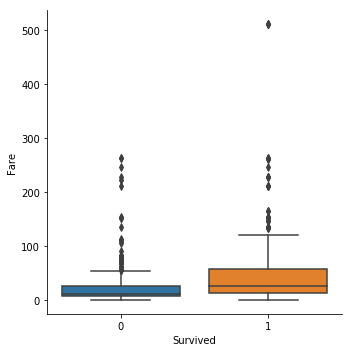

In [18]:
# Воспользуйтесь функцией catplot() с параметром kind ='box'
# и построите боксплот стоимости проезда (по оси y отложено Fare)
# по оси x должны быть боксплоты соответствующие выжившим и погибшим (Survived)

sns.catplot(x = 'Survived', y = 'Fare', data=data_train, kind="box");

#### Вопрос:

Насколько получившийся график информативен?

> Что-то не очень.

Давайте попытаемся его улучшить, построив вместо боксплота violin plot

(тот же боксплот но показывающий функцию распределения вместо боксов).

Для этого воспользуемся функцией .violinplot()

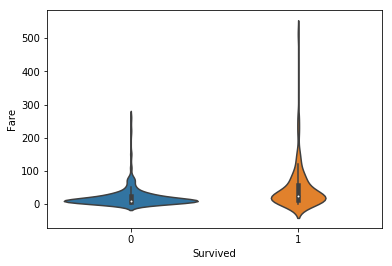

In [19]:
# Воспользуйтесь функцией violinplot()
# и построите violin plot стоимости проезда (по оси y отложено Fare)
# по оси x должны быть боксплоты соответствующие выжившим и погибшим (Survived)


sns.violinplot(x = 'Survived', y = 'Fare',
               data=data_train);

#### Вопрос:

Стал ли график понятнее?

Угу

### 3.4. Давайте построим график совместного распределения Возраста и Стоимости проезда

Для этого можно воспользоваться функцией jointplot
Параметры .jointplot():

* **x** - какая величина будет расположена по оси X 
* **y** - какая величина будет расположена по оси Y
* **data** - из какой переменной брать столбец переданный в **x, y**.
* **kind** - тип графика, scatter, kde, и другие


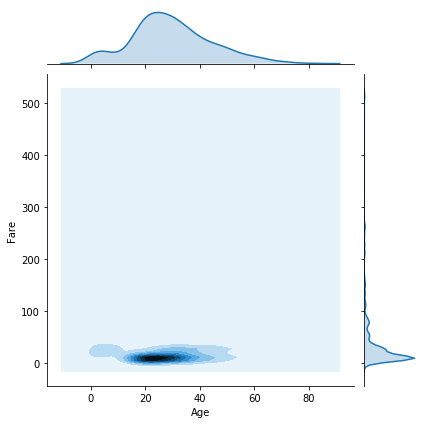

In [21]:
# Постройте график совместного распределения Возраста и Стоимости проезда
# установите kind равным kde

sns.jointplot(x="Age", y="Fare", data=data_train, kind="kde");

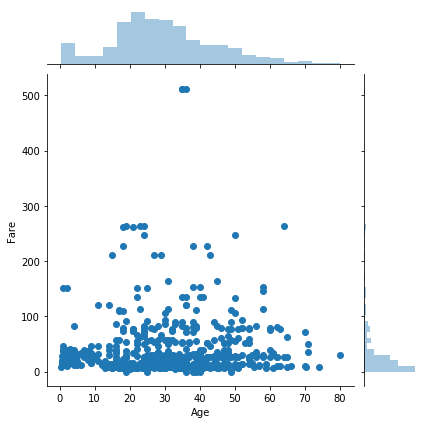

In [22]:
# Постройте график совместного распределения Возраста и Стоимости проезда
# установите kind равным scatter 

sns.jointplot(x="Age", y="Fare", data=data_train, kind="scatter");

Вариант с kind = 'kde' получается каким-то странным, вероятно дело в том,

что есть несколько человек с аномально большой **Стоимостью проезда**,

давайте выбросим те наблюдейния которые находятся правее 
.95-ого квантиля. 

Для этого воспользуемся методом **.quantile()** 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html


PS предварительно необходимо импортировать библиотеку numpy с именем np

In [23]:
# импортируйте библиотеку numpy c именем np

import numpy as np

In [24]:
# Воспользуйтесь методом .quantile
# для обнаружения .95ого квантиля Стоимости проезда
# сохраните результат в переменную q

q = data_train["Fare"].quantile(0.95)
print(q)

112.07915


Для того чтобы найти индексы строк в которых значение в столбце Fare
**больше** чем q мы можем воспользоваться функцией из пакета numpy where

https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

она вернет вам tuple из одного элемента - нампаевского массива,

сохраните этот нампаевский массив в переменную **ind** (не весь tuple а именно нампаевский массив)

добавьте к нему 1, поскольку индексация ваших строк в data_train начинается не с 0 а с 1.

In [25]:
# Найдите индексы строк в которых значение в столбце Fare больше чем q
# для этого воспользуйтесь функцией np.where

ind = np.where(data_train['Fare'] > q)[0]+1

Для того чтобы выкинуть строки с индексами хранящимися в переменной **ind**

воспользуемся методом .drop() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

Нам нужно будет использовать два его параметра:

* index - это могут быть индексы строк или номер/названия колонок, в зависимости от значения параметра axis (сюда передаем ind)
* axis - по какому измерению выбрасывать (столбцы или строки), axis = 0 соответствует строкам, 1 - столбцам (устанавливаем 0)

сохраним результат в переменную **data_new**

In [26]:
# Выбросите из data_train строки с номерами ind
# и сохраните результат в переменную data_new

data_new = data_train.drop(index=np.where(data_train['Fare'] > q)[0]+1, axis=0)

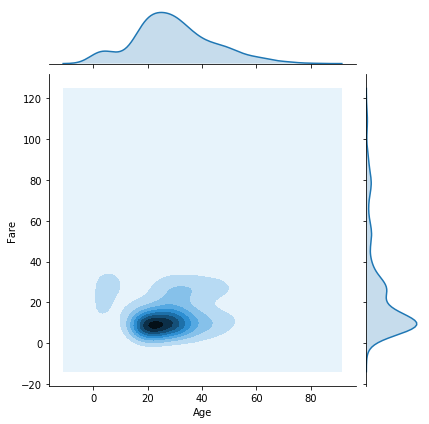

In [27]:
# Постройте еще один jointplot()
# но на это раз в качестве переменной data передайте data_new

sns.jointplot(x="Age", y="Fare", data=data_new, kind="kde");

### 3.5. Постройте дополнительные графики которые сочтете нужными

Например вы можете посмотреть:

1. Зависила ли выживаемость от порта посадки
2. Существует ли связь между длинной имени стоимостью билета
3. Плыли ли на Титанике 3 поколения одной семьи (SibSp, Parch)
4. Зависила ли выживаемость от возраста, пола, палубы, наличия семьи.
5. -

!

> Отлично. Мы построили какие графики - мы проверили какие то гипотезы. Модели машинного обучения тупые, но мы умные, мы можем проверить гипотезы что есть зависимости от какого то признака и явно передать в модель эту гипотезу - например если подтвердится что выживаемость хоть как то зависит от возраста - надо передать в модель возраст, а если от пола и возраста, надо создать такой признак который бы хранил в себе эту информацию!

# 4. Обработаем категориальные признаки

Для начала давайте создадим два листа, один будет содержать названия всех **Категориальных признаков**,
а другой названия всех **Числовых признаков**, первый назовем **cat_features**, второй - **num_features**.

Далее мы напишем две функции, одну для обработки **категориальных** признаков, другую для обработки **числовых**.

PS не включайте Целевую переменную ни в один из этих списков!!

In [28]:
data_train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S
778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S
676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S
531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S


In [29]:
# Заведите два листа со списком категориальных и числовых признаков

cat_features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']
num_features = ['Age', 'Fare', 'SibSp', 'Parch']

Разные категориальные признаки надо обрабатывать по разному:

* Name - Кажется что имя не должно влиять на выживаемость, тут есть одно но, мы можем предположить что чем длиннее имя тем в болеее привелигированном сословии человек находился (это не обязательно верное предположение) и вместо имени хранить длину имени. Другие стратегию обработки имени можно найти в Kernels (например вытаскивать Mr. Ms. Miss. и Mrs.).
* Cabin - В этом столбце очень много пропусков (Сколько?) поэтому можно было бы его просто викинуть, но лучше (возможно, а возможно и нет) завести новую переменную в которой будет записан 0 если в столбце Cabin был пропуск и 1 если там было какое то значение.
* Ticket - сложно, во-первых много уникальных значений, во-вторых нет пропусков, итого мы можем заметить что у некоторых людей один номер билета. Возможно дети были вписаны в билет родителей в таком случае можно выкинуть этот признак (информация о родителях и так есть в отдельном столбце). А можно и не выкидывать.
* Embarked - тут все просто, закодируем с помощью one-hot encoding'а https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f  (Илья показывал на лекции)
* Pclass - воспользуемся one-hot encoding'ом. А можно было бы например оставить 1 признак - был ли пассажир - пассажиром 1ого класса.
* Sex - используем кодирование числом, female - 1, male - 0 (или можно снова воспользоваться one-hot encoding'ом)

-------------

Для кодирования категориальныз переменных в пакете sklearn есть 2 функции обе в модуле preprocessing:
1. OrdinalEncoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder (может не оказаться в вашей версии sklearn)

2. OneHotEncoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

В библиотеке pandas есть удобная функция **.get_dummies()** которая так же позволяет использовать one-hot encoding


PS С one-hot encoding'ом может возникнуть неприятность если в вашей тестовой выборке в каком нибудь категориальном признаке окажется категория которой не было в тренировочной выборке.

### 4.1 Кодирование имени

в pandas есть очень удобный способ обрабатывать отдельные столбцы и/или строки,
с использованием метода .apply() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

Он позволяет применить одну и ту же функцию (например функцию возвращающую длину строки) ко всем 
строкам нужного столбца/столбцов.

**Пример использования apply**

1. http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/
2. https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_dataframes/

In [30]:
# Воспользуйтесь функцией len - возвращает длину строки
# чтобы закодировать имя - длиной имени
# обратите внимание что функцию len нужно передавать в apply без круглых скобок и без аргумента.

data_train['Name'].apply(len)[:10]

PassengerId
1     23
2     51
3     22
4     44
5     24
6     16
7     23
8     30
9     49
10    35
Name: Name, dtype: int64

### 4.2 Обратка признака Кабина

Опять воспользуемся методом apply()
для этого воспользуемся тем фактом что nan имеет тип float: сперва напишем коротенькую функцию которая проверяет тип переменной, если это строка (str) тогда вернем 1 (есть запись, например 'C123' или  'C103'), если же это float (т.е. nan) вернем 0 (то есть значение пропущено).

теперь воспользуемся методом .apply() на столбец Кабина передав в качестве аргумента нашу написанную функцию.




In [31]:
# Напишите свою функцию для обработки стобца Кабина
# и воспользуйтесь методом .apply чтобы применить ее
# ко всем записям


def cabin(val):
    if type(val) is str:
        return 1
    else:
        return 0

data_train.Cabin.apply(cabin)[:10]

PassengerId
1     0
2     1
3     0
4     1
5     0
6     0
7     1
8     0
9     0
10    0
Name: Cabin, dtype: int64

### 4.3 Обработка признака Ticket

Для того чтобы выбрасывать столбцы/строки из DataFrame есть специальный метод .drop() мы уже пользовались им выше когда обрабатывали аутлаеры (выбросы).
На этот раз обратите внимание на параметры

* labels
* axis

и 

* inplace 


In [32]:
# Выкиньте столбец Ticket из наших данных
# оставьте параметр inplace со значением False

data_train.drop(labels='Ticket', axis=1).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### 4.4. Место посадки и Класс

Воспользуемся функцией pd.get_dummies() к столбцу Место посадки и столбцу Пассажирский Класс

обратите внимание на сигнатуру функции get_dummies особенно на поля data  и columns

In [33]:
# примените функцию pd.get_dummies() к нужному столбцу

pd.get_dummies(data_train, columns = ['Embarked', 'Pclass'])[['Embarked_C', 'Embarked_Q',
                                                              'Embarked_S', 'Pclass_1',
                                                              'Pclass_2', 'Pclass_3', ]][:3]

,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,
1,0,0,1,0,0,1
2,1,0,0,1,0,0
3,0,0,1,0,0,1


### 4.5. Пол

воспользуйтесь методом apply или функцией get_dummies или импортируйте OrdinalEncoder (или LabelEncoder) из
модуля preprocessing пакета sklearn

In [34]:
# Обработайте столбец Пол
def sex(x):
    if x == 'male':
        return 0
    else:
        return 1

data_train.Sex.apply(sex)[:5]

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Sex, dtype: int64

> TODO Добавьте по своему вкусу еще каких нибудь фичей

### 4.6. Соберем это все в одну единую функцию

На вход она будет принимать датафрейм а на выходе новый датафрейм с закодированными категориальными признаками.

PS Я оставлю полную функцию и не стану ее удалять, она ниже

In [35]:
def process_cat(df, ):
    
    def cabin(val):
        if type(val) is str:
            return 1
        else:
            return 0
    
    def sex(x):
        if x == 'male':
            return 0
        else:
            return 1
    
    df['Name_len'] = df['Name'].apply(len)
    df['is_Cabin'] = df['Cabin'].apply(cabin)
    df['Sex'] = df['Sex'].apply(sex)    
    df = pd.get_dummies(df, columns = ['Embarked', 'Pclass'])
    
    df.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
    
    return df

In [36]:
df = process_cat(data_train, )

In [37]:
data_train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,is_Cabin
PassengerId,,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,21,0
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",1,NaN,1,0,17453,89.1042,C92,C,44,1
172,0,3,"Rice, Master. Arthur",0,4.0,4,1,382652,29.1250,NaN,Q,20,0
160,0,3,"Sage, Master. Thomas Henry",0,NaN,8,2,CA. 2343,69.5500,NaN,S,26,0
244,0,3,"Maenpaa, Mr. Matti Alexanteri",0,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S,29,0
242,1,3,"Murphy, Miss. Katherine ""Kate""",1,NaN,1,0,367230,15.5000,NaN,Q,30,0
450,1,1,"Peuchen, Major. Arthur Godfrey",0,52.0,0,0,113786,30.5000,C104,S,30,1
853,0,3,"Boulos, Miss. Nourelain",1,9.0,1,1,2678,15.2458,NaN,C,23,0
240,0,2,"Hunt, Mr. George Henry",0,33.0,0,0,SCO/W 1585,12.2750,NaN,S,22,0


# 5. Обработка числовых признаков

* Возраст - в этой колонке есть пропущенные значения, я предлагаю заполнить их средним значением внутри каждого пола, затем надо будет применить шкалирование
* Цена билета - применим шкалирование

Остальные числовые колонки оставим как есть

### 5.1. Заполнение пропущенных значений в колокне Возраст

для заполнения пропущенных значений в пакете pandas есть специальная функция .fillna()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

для группировки значений - метод .groupby()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

для преобразования значений внутри групп, специальный метод transform. 

------

Давайте посмотрим как работает метод **.groupby()** на нескольких примерах:

In [38]:
data_train.groupby(['Sex'])['Age'].mean()

Sex
0    30.726645
1    27.915709
Name: Age, dtype: float64

In [39]:
data_train.groupby(['Sex', 'Pclass'])['Age'].median()

Sex  Pclass
0    1         40.0
     2         30.0
     3         25.0
1    1         35.0
     2         28.0
     3         21.5
Name: Age, dtype: float64

In [40]:
data_train.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex  Pclass
0    1         0.368852
     2         0.157407
     3         0.135447
1    1         0.968085
     2         0.921053
     3         0.500000
Name: Survived, dtype: float64

In [41]:
data_train.groupby(['Pclass'])['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [42]:
data_train.groupby(['Pclass'])['Fare'].min()

Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float64

In [43]:
data_train.groupby(['Pclass'])['Fare'].quantile(.03)

Pclass
1    25.739375
2     5.145000
3     6.975000
Name: Fare, dtype: float64

In [44]:
data_train.groupby(['Sex', 'Pclass', 'Embarked'])['Age', 'Fare'].mean()

Age        Fare
Sex Pclass Embarked                       
0   1      C         40.111111   93.536707
           Q         44.000000   90.000000
           S         41.897188   52.949947
    2      C         25.937500   25.421250
           Q         57.000000   12.350000
           S         30.875889   19.232474
    3      C         25.016800    9.352237
           Q         28.142857   11.924251
           S         26.574766   13.307149
1   1      C         36.052632  115.640309
           Q         33.000000   90.000000
           S         32.704545   99.026910
    2      C         19.142857   25.268457
           Q         30.000000   12.350000
           S         29.719697   21.912687
    3      C         14.062500   14.694926
           Q         22.850000   10.307833
           S         23.223684   18.670077

-----

Теперь давайте посмотрим как работает метод **.transform()**:
Выше я применял функции mean(), max(), min(), quantile() к числовым признакам, внутри какой то группы в категории,

а что если нужной мне функции нет? Тут на помощь приходит метод **.apply()**. Вы можете написать любую нужную вам функцию и использовать конструкцию **groupby().apply(func)**

А что же сделает **.transorm()**? Он во всех группах заменит значения на те которые вы получили с помощью groupby().apply(func)

Давайте посмотрим на примере:

In [45]:
def percent(x):
    return str(100* np.round(np.mean(x), 2)) + '%'


data_train.groupby(['Sex', 'Pclass'])['Survived'].apply(percent)

Sex  Pclass
0    1                       37.0%
     2                       16.0%
     3         14.000000000000002%
1    1                       97.0%
     2                       92.0%
     3                       50.0%
Name: Survived, dtype: object

In [46]:
data_train.groupby(['Sex', 'Pclass'])['Survived'].transform(percent)[:5]

PassengerId
1    14.000000000000002%
2                  97.0%
3                  50.0%
4                  97.0%
5    14.000000000000002%
Name: Survived, dtype: object

In [47]:
data_train.groupby(['Sex', 'Pclass'])['Survived'].count()

Sex  Pclass
0    1         122
     2         108
     3         347
1    1          94
     2          76
     3         144
Name: Survived, dtype: int64

Конечно нет никакой нужды сначала использовать apply а потом transform,

просто делаете transform

---

Ну и наконец метод **.fillna()** позволяет заполнить пропущенные значения в

столбце/столбцах с использованием какого то значения

В примере следите за **6 строкой**:

In [48]:
data_train['Age'][:10]

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [49]:
data_train['Age'].fillna(0)[:10]

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      0.0
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [50]:
data_train['Age'].fillna(9999)[:10]

PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
6     9999.0
7       54.0
8        2.0
9       27.0
10      14.0
Name: Age, dtype: float64

In [51]:
data_train['Age'].fillna(np.mean(data_train['Age']))[:10]

PassengerId
1     22.000000
2     38.000000
3     26.000000
4     35.000000
5     35.000000
6     29.699118
7     54.000000
8      2.000000
9     27.000000
10    14.000000
Name: Age, dtype: float64

In [52]:
np.mean(data_train['Age'])

29.69911764705882

### Теперь давайте заполним пропущенные значения в Age средним значением внутри групп по полу

То есть у женщин заполним пропуски возраста средним возрастом у женщин,
а у мужчин пропуски возраста заполним средним возрастом у мужчин.

Здесь вы найдете ответ как это сделать: 
https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

скомбинировав groupby, transform и fillna

In [53]:
data_train.groupby(['Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
6      30.726645
7      54.000000
8       2.000000
9      27.000000
10     14.000000
11      4.000000
12     58.000000
13     20.000000
14     39.000000
15     14.000000
16     55.000000
17      2.000000
18     30.726645
19     31.000000
20     27.915709
21     35.000000
22     34.000000
23     15.000000
24     28.000000
25      8.000000
26     38.000000
27     30.726645
28     19.000000
29     27.915709
30     30.726645
         ...    
862    21.000000
863    48.000000
864    27.915709
865    24.000000
866    42.000000
867    27.000000
868    31.000000
869    30.726645
870     4.000000
871    26.000000
872    47.000000
873    33.000000
874    47.000000
875    28.000000
876    15.000000
877    20.000000
878    19.000000
879    30.726645
880    56.000000
881    25.000000
882    33.000000
883    22.000000
884    28.000000
885    25.000000
886    39.000000
887    27.000000
888    19.000000
88

In [54]:
# Заполните пропущенные значения в столбце Age 
# используя функции groupby, transform и fillna

data_train['Age'] = data_train.groupby(['Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
data_train['Age'][:10]

PassengerId
1     22.000000
2     38.000000
3     26.000000
4     35.000000
5     35.000000
6     30.726645
7     54.000000
8      2.000000
9     27.000000
10    14.000000
Name: Age, dtype: float64

### 5.2. Применим шкалирования для Возраста и Цены на билет

Для этого воспользуемся классом **StandardScaler** или **MinMaxScaler** из модуля preprocessing
пакета sklearn

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
# создайте объект класса StandardScaler()
# и воспользуйтесь методом fit_transform на колонки Age и Fare

scaler = StandardScaler()

scaler.fit_transform(data_train[['Age', 'Fare']])

array([[-0.59473226, -0.50244517],
       [ 0.63531868,  0.78684529],
       [-0.28721953, -0.48885426],
       ...,
       [-0.13994331, -0.17626324],
       [-0.28721953, -0.04438104],
       [ 0.17404958, -0.49237783]])

### 5.3. Объединим пункты 5.1 и 5.2 в единую функцию


In [57]:
def process_num(df, scaler=None):
    
    df['Age'] = df.groupby(['Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
    
    if scaler is None:
        
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaler.fit(df[['Age', 'Fare']])

    
    df['Fare'].fillna(df['Fare'].median())
    df[['Age', 'Fare']] = scaler.transform(df[['Age', 'Fare']])
    
    return df, scaler

In [58]:
df, scaler = process_num(data_train)

In [59]:
df[['Age', 'Fare']].head()

,Age,Fare
PassengerId,,
1,-0.594732,-0.502445
2,0.635319,0.786845
3,-0.287220,-0.488854
4,0.404684,0.420730
5,0.404684,-0.486337


In [70]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,is_Cabin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,-0.594732,1,0,A/5 21171,-0.502445,NaN,S,23,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.635319,1,0,PC 17599,0.786845,C85,C,51,1
3,1,3,"Heikkinen, Miss. Laina",1,-0.287220,0,0,STON/O2. 3101282,-0.488854,NaN,S,22,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.404684,1,0,113803,0.420730,C123,S,44,1
5,0,3,"Allen, Mr. William Henry",0,0.404684,0,0,373450,-0.486337,NaN,S,24,0


# 6. Обучение моделей и сабмит

In [235]:
data_train = pd.read_csv('titanic/train.csv', index_col=0)
data_test = pd.read_csv('titanic/test.csv', index_col=0)

##### Предобработка

In [236]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [237]:
data_train, scaler = process_num(data_train)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,-0.594732,1,0,A/5 21171,-0.502445,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.635319,1,0,PC 17599,0.786845,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,-0.287220,0,0,STON/O2. 3101282,-0.488854,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.404684,1,0,113803,0.420730,C123,S
5,0,3,"Allen, Mr. William Henry",male,0.404684,0,0,373450,-0.486337,NaN,S


In [238]:
data_train = process_cat(data_train, )
data_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Name_len,is_Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,
1,0,0,-0.594732,1,0,-0.502445,23,0,0,0,1,0,0,1
2,1,1,0.635319,1,0,0.786845,51,1,1,0,0,1,0,0
3,1,1,-0.287220,0,0,-0.488854,22,0,0,0,1,0,0,1
4,1,1,0.404684,1,0,0.420730,44,1,0,0,1,1,0,0
5,0,0,0.404684,0,0,-0.486337,24,0,0,0,1,0,0,1


In [239]:
data_test, scaler = process_num(data_test)
data_test = process_cat(data_test, )

In [240]:
data_test.Fare.unique()

array([-0.49781052, -0.51265996, -0.46453181, -0.48288766, -0.41797062,
       -0.47281432, -0.50139215, -0.11868068, -0.50855541, -0.2055352 ,
       -0.49661784, -0.17240513,  0.83522732,  0.45751401, -0.14158878,
       -0.41685136, -0.50863062, -0.49609492,  0.42572705, -0.58123384,
       -0.07062774,  0.46117086,  4.06063358, -0.37834884,  0.47191575,
       -0.09181846, -0.24978266, -0.07391031, -0.26955683, -0.21807091,
        0.3961786 , -0.4938564 , -0.46788958,  0.3737182 , -0.39774874,
       -0.16255564, -0.49743803, -0.40521106,  0.30313144, -0.10614497,
       -0.49922884,  0.72822613, -0.35327743,  0.43647194, -0.36879842,
       -0.22612957,  4.07182618, -0.35902236, -0.11644216, -0.50101966,
       -0.3496958 , -0.39625699, -0.49967655, -0.26194587, -0.49691511,
        0.12128852, -0.1269632 ,  3.1495565 , -0.17777757, -0.36499294,
        3.33363795, -0.44625117, -0.37916903, -0.38909373, -0.49878114,
        0.29320675, -0.49840865,  0.77404055, -0.49736281,  0.35

In [241]:
data_test['Fare'] = data_test['Fare'].fillna(data_test['Fare'].median())

In [242]:
data_test.Fare.unique()

array([-0.49781052, -0.51265996, -0.46453181, -0.48288766, -0.41797062,
       -0.47281432, -0.50139215, -0.11868068, -0.50855541, -0.2055352 ,
       -0.49661784, -0.17240513,  0.83522732,  0.45751401, -0.14158878,
       -0.41685136, -0.50863062, -0.49609492,  0.42572705, -0.58123384,
       -0.07062774,  0.46117086,  4.06063358, -0.37834884,  0.47191575,
       -0.09181846, -0.24978266, -0.07391031, -0.26955683, -0.21807091,
        0.3961786 , -0.4938564 , -0.46788958,  0.3737182 , -0.39774874,
       -0.16255564, -0.49743803, -0.40521106,  0.30313144, -0.10614497,
       -0.49922884,  0.72822613, -0.35327743,  0.43647194, -0.36879842,
       -0.22612957,  4.07182618, -0.35902236, -0.11644216, -0.50101966,
       -0.3496958 , -0.39625699, -0.49967655, -0.26194587, -0.49691511,
        0.12128852, -0.1269632 ,  3.1495565 , -0.17777757, -0.36499294,
        3.33363795, -0.44625117, -0.37916903, -0.38909373, -0.49878114,
        0.29320675, -0.49840865,  0.77404055, -0.49736281,  0.35

##### Генерация признаков

##### Удаление ненужных столбцов

##### Переходим к обучению

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X = data_train.drop('Survived', axis=1)
y = np.array(data_train['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X.copy(),y)

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [246]:
logistic_regression = LogisticRegression()

In [247]:
logistic_regression.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [248]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [249]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

##### Предсказание и сохранение ответа для сабмита.

In [250]:
answer = logistic_regression.predict(data_test)

In [251]:
answer

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [252]:
neigh.predict(data_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [253]:
data_test['Survived'] = answer

In [254]:
new_data_test = data_test.drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_len', 'is_Cabin',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3'])

In [255]:
new_data_test.to_csv('kaggle_submission.csv')

Сабмит!

Name                  Submitted Wait time Execution time Score
kaggle_submission.csv just now  0 seconds 0 seconds      0.74162 ( :( )